# Nuvem de Palavras - Eleições 2022
<br>

### Introdução: 
A ideia desse projeto é montar uma nuvem de palavras que realçe os termos mais frequentes nas    postagens relacioanadas as **Eleições Brasileiras de 2022**.

<br>

### Dados Utilizados: 
Os dados utilizados correspondem as últimas 100 postagens do Twitter que envolvam a **#Eleições2022**, eles são obtidos por meio da API Oficial do Twitter.

(Para facilitar a remoção das StopWords, todas as palavras foram padronizadas como mínusculas e sem acentuação).


<br>

##### Todas as células estão comentadas de maneira que qualquer pessoa possa compreender, reproduzir e modificar o projeto.

In [12]:
# Importação das bibliotecas.
import pandas as pd
import tweepy
import numpy as np
import unidecode as und
import matplotlib.pyplot as plt
import os
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
# Autenticação da API do Twitter utilizando a biblioteca Tweepy.
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAMk2ggEAAAAAT3Xt8sh9GIlDnQ42YCm%2BIhiDv4c%3DULom2I0sqL3xf0lsxBI1elOPS7SGBglj1wGRAdqnZq6FZ5k6Oo'
client = tweepy.Client(bearer_token)

In [5]:
# Buscando os 100 tweets mais recentes com base na #Eleições2022 (A altere conforme sua pesquisa).
response = client.search_recent_tweets('#Eleições2022 -#SOSBrasil', max_results=100)

In [6]:
# Imprimindo Tweets para verificação.
tweets = response.data
for tweet in tweets:
    print(tweet.text)

Programa eleitoral de tv do Lula de hoje vai ser quase que 100% focado nas mulheres #Eleicoes2022
#Eleicoes2022  #Eleicoes2022opovo https://t.co/yo9lo3H2Pn
@folha A se arrependeu, está tudo ok, não precisa nenhuma punição.
Você é bandido, e como tal deve ser tratado!!!
#chega
#Eleicoes2022
RT @Datoworld: 🇧🇷 #Eleicoes2022 - Nacional

🔵 Jair Bolsonaro 40% +3
🔴 Lula da Silva 37% -3 

Modalmais/Futura - Agosto
#Eleicoes2022 Metade dos eleitores se informam sobre eleições e candidatos pelo noticiário da TV ou rádio. Os dados são da pesquisa Ipespe/Abrapel divulgados hoje. Matéria no site da @CNNBrasil : https://t.co/UvhRfDsvIk
RT @choquei: 🚨BRASIL: Justiça Eleitoral determina busca e apreensão na casa do ex-juiz Sergio Moro. #Eleições2022
RT @oFelipeManoel: Encontrei com @cirogomes e @gisellebezerra em Curitiba, fui fazer uma pergunta e eles me reconheceram pelo meu trabalho.…
RT @GringaBrazilien: Pesquisa IPESP #Eleicoes2022 
LULA 44% ↑  (+1) 
Bolso 35% → (0)  
Comparado ao fim de AGO, Lul

In [7]:
# Armazenando os tweets em um dataframe
tweets_list = [[tweet.text] for tweet in tweets]
df = pd.DataFrame(tweets_list,columns=['Texto'])
pd.options.display.max_colwidth = 500
df

,Texto
0,Programa eleitoral de tv do Lula de hoje vai ser quase que 100% focado nas mulheres #Eleicoes2022
1,#Eleicoes2022 #Eleicoes2022opovo https://t.co/yo9lo3H2Pn
2,"@folha A se arrependeu, está tudo ok, não precisa nenhuma punição.\nVocê é bandido, e como tal deve ser tratado!!!\n#chega\n#Eleicoes2022"
3,RT @Datoworld: 🇧🇷 #Eleicoes2022 - Nacional\n\n🔵 Jair Bolsonaro 40% +3\n🔴 Lula da Silva 37% -3 \n\nModalmais/Futura - Agosto
4,#Eleicoes2022 Metade dos eleitores se informam sobre eleições e candidatos pelo noticiário da TV ou rádio. Os dados são da pesquisa Ipespe/Abrapel divulgados hoje. Matéria no site da @CNNBrasil : https://t.co/UvhRfDsvIk
...,...
95,🇧🇷 #Eleicoes2022 - Nacional\n\n🔵 Jair Bolsonaro 40% +3\n🔴 Lula da Silva 37% -3 \n\nModalmais/Futura - Agosto
96,RT @Franciely_lusto: Faltam 29 🇧🇷♥️\n#LulaNo1ºTurno #Vote13\n#Eleicoes2022 https://t.co/aNawCu4ldg
97,#Ciro12 #eleicoes2022 https://t.co/nFNLb3Nmat
98,RT @em_com: 'DEMITAM SEM DÓ'\nA socialite Roseli D'Agostini Lins pediu para que agricultores “demitam sem dó” funcionários que votarem em Lu…


In [8]:
# Agrupando os tweets em uma string única, removendo acentuações e deixando tudo em mínusculo.
string = und.unidecode(pd.Series(df['Texto'].values).str.cat(sep=' ').lower())
string

'programa eleitoral de tv do lula de hoje vai ser quase que 100% focado nas mulheres #eleicoes2022 #eleicoes2022  #eleicoes2022opovo https://t.co/yo9lo3h2pn @folha a se arrependeu, esta tudo ok, nao precisa nenhuma punicao.\nvoce e bandido, e como tal deve ser tratado!!!\n#chega\n#eleicoes2022 rt @datoworld:  #eleicoes2022 - nacional\n\n jair bolsonaro 40% +3\n lula da silva 37% -3 \n\nmodalmais/futura - agosto #eleicoes2022 metade dos eleitores se informam sobre eleicoes e candidatos pelo noticiario da tv ou radio. os dados sao da pesquisa ipespe/abrapel divulgados hoje. materia no site da @cnnbrasil : https://t.co/uvhrfdsvik rt @choquei: brasil: justica eleitoral determina busca e apreensao na casa do ex-juiz sergio moro. #eleicoes2022 rt @ofelipemanoel: encontrei com @cirogomes e @gisellebezerra em curitiba, fui fazer uma pergunta e eles me reconheceram pelo meu trabalho.... rt @gringabrazilien: pesquisa ipesp #eleicoes2022 \nlula 44% |  (+1) \nbolso 35% - (0)  \ncomparado ao fim de

In [9]:
# Removendo alguns caracteres especiais.
caracteres = "#@"

for i in range(len(caracteres)):
    string = string.replace(caracteres[i],"")
string

'programa eleitoral de tv do lula de hoje vai ser quase que 100% focado nas mulheres eleicoes2022 eleicoes2022  eleicoes2022opovo https://t.co/yo9lo3h2pn folha a se arrependeu, esta tudo ok, nao precisa nenhuma punicao.\nvoce e bandido, e como tal deve ser tratado!!!\nchega\neleicoes2022 rt datoworld:  eleicoes2022 - nacional\n\n jair bolsonaro 40% +3\n lula da silva 37% -3 \n\nmodalmais/futura - agosto eleicoes2022 metade dos eleitores se informam sobre eleicoes e candidatos pelo noticiario da tv ou radio. os dados sao da pesquisa ipespe/abrapel divulgados hoje. materia no site da cnnbrasil : https://t.co/uvhrfdsvik rt choquei: brasil: justica eleitoral determina busca e apreensao na casa do ex-juiz sergio moro. eleicoes2022 rt ofelipemanoel: encontrei com cirogomes e gisellebezerra em curitiba, fui fazer uma pergunta e eles me reconheceram pelo meu trabalho.... rt gringabrazilien: pesquisa ipesp eleicoes2022 \nlula 44% |  (+1) \nbolso 35% - (0)  \ncomparado ao fim de ago, lula subiu 

In [10]:
# Removendo classes de palavras contidas na lista do arquivo Stopwords.py (o mesmo pode ser modificado).
import stopwords as sw
stopwords = set(STOPWORDS)
stopwords.update(sw.stopwords)

In [13]:
# A Nuvem de Palavras irar possuir uma Máscara (um formato/molde), no nosso caso será o mapa do Brasil.
# Para isso é necessário transformar a imagem em um array utilizando a biblioteca Numpy (o outra).
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
brazil_flag = np.array(Image.open(path.join(d, "brazil_flag.png")))

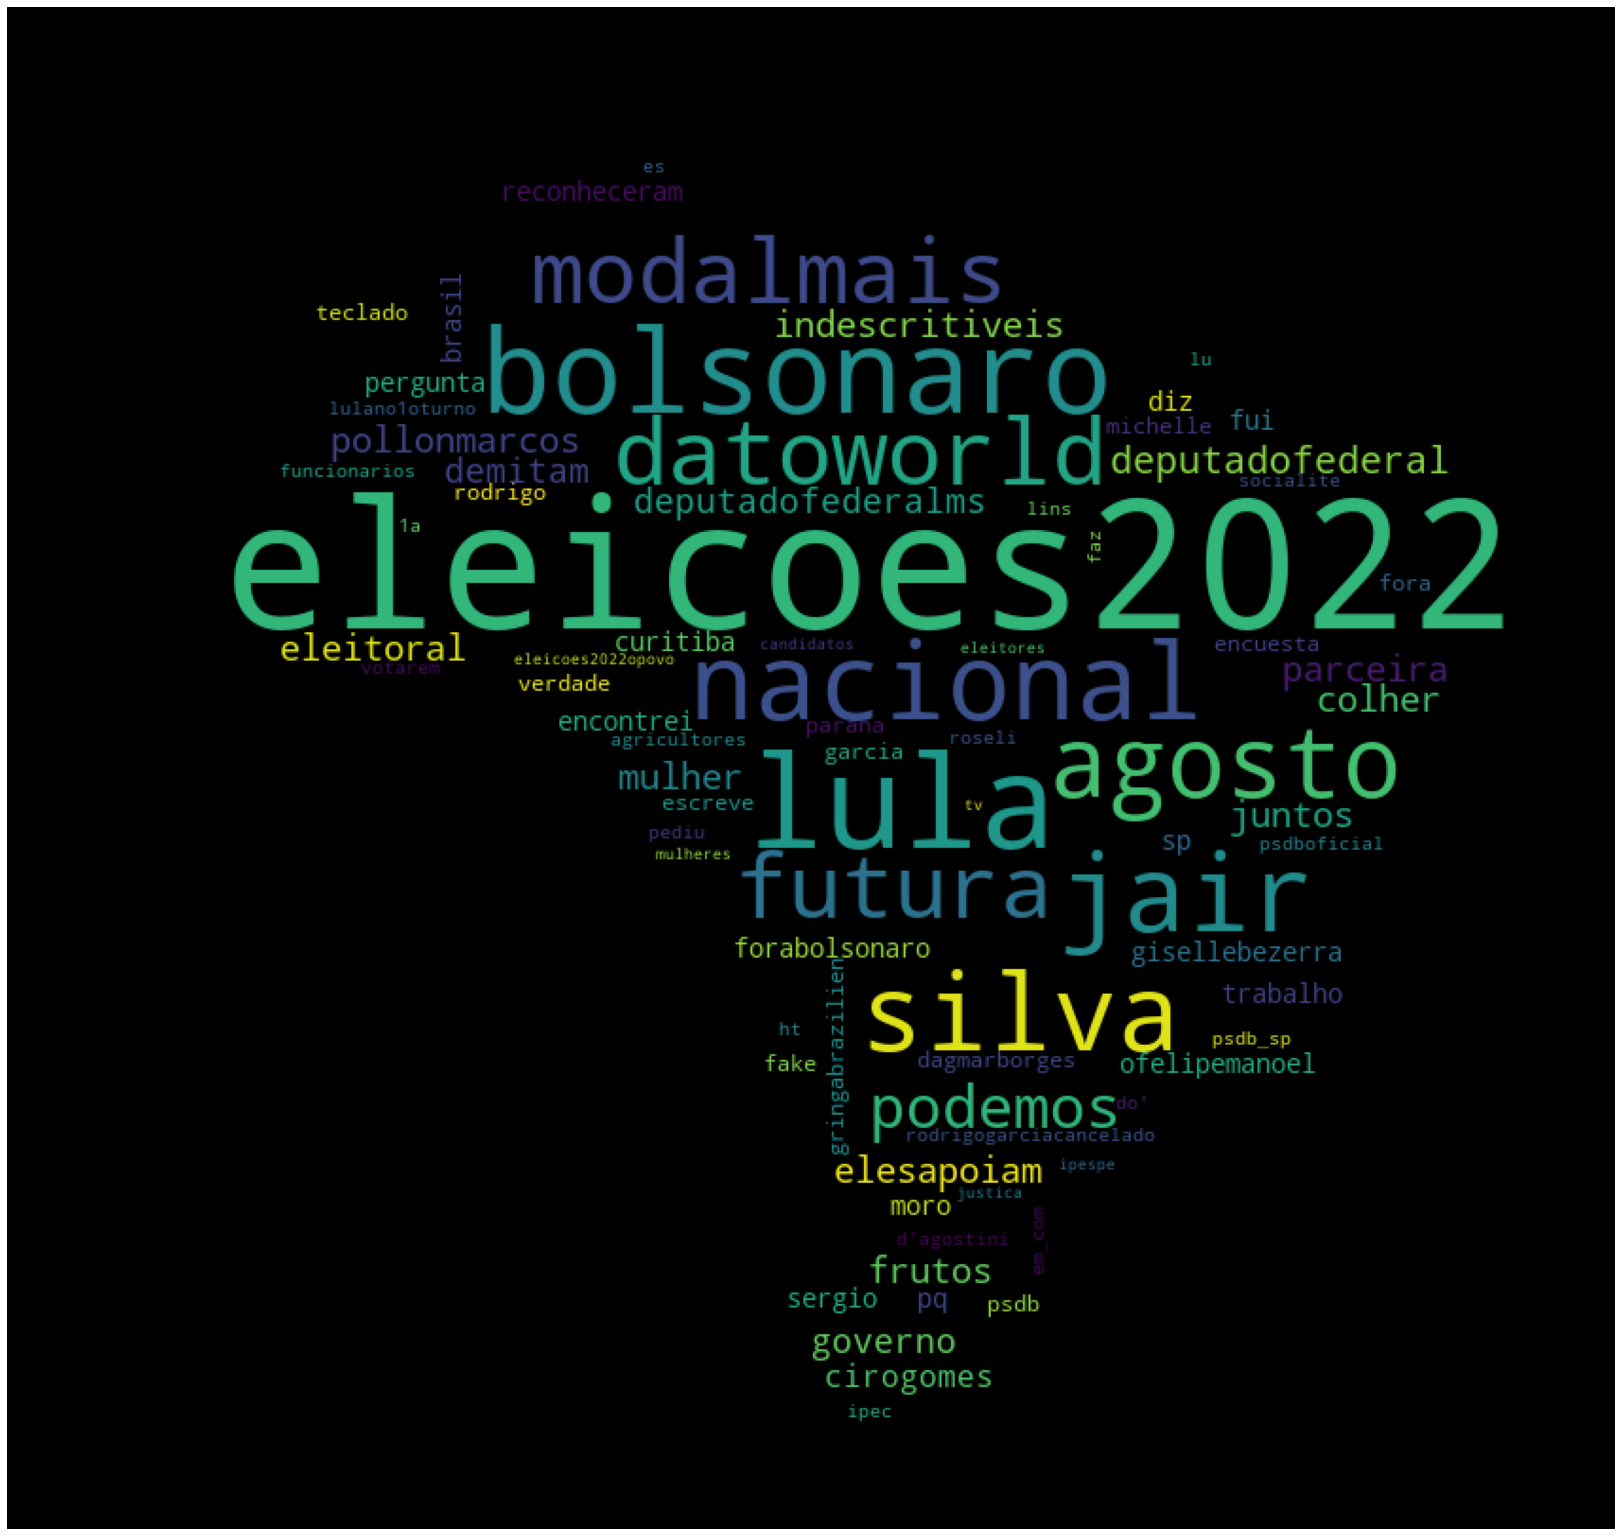

In [19]:
# Criando a Nuvem de Palavras utilizando a biblioteca WordCloud.
wc = WordCloud(width=2000, stopwords=stopwords, height=1200, mask=brazil_flag, max_font_size=200,
               max_words=80, collocations=False, background_color='black').generate(string)

# Criando a coloração apartir da imagem máscara.
image_colors = ImageColorGenerator(brazil_flag)

# Configurando a exibição da Nuvem de Palavras
fig, axes = plt.subplots(figsize=(50,28))
axes.imshow(brazil_flag, cmap=plt.cm.gray, interpolation="bilinear")
axes.set_axis_off()

# Exibindo a Nuvem de palavras e a exportando com imagem para a pasta no qual o projeto se encontra.
plt.imshow(wc)
wc.to_file('brasil.png')




## Autor: Romario Henrique C. Rodrigues